# HW3A - Implementing a dashboard as a webpage to visualize NYC air quality across time

In [153]:
# the following package is needed to run the tests from your laptop,
# so that the tests can import the variables defined in this notebook.
#
# pip install ipynb

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import seaborn as sns

## Q1: Parse XML into Pandas Dataframe

In the hw3 folder you will find the raw XML data ``air_quality.xml`` for the NYC air quality data obtained from [the NYC open data](https://data.cityofnewyork.us/Environment/Air-Quality/c3uy-2p5r/about_data). 

Your task includes the following:

* Read the data description in the website linked above. Pay special attention to what each column means in the ``Columns (12)`` section.

* Parse the XML data and store it in a Pandas dataframe variable ``df``. Assign appropriate datatypes to eligible columns (e.g. dates, numeric values). Feel free to explore the dataframe and see what it contains.

In [155]:
# Your goal is to populate the following DataFrame:

## ----- TODO: Create a DataFrame from the XML data. ----
## Your code here:


df = pd.DataFrame()

file_path = 'air_quality.xml' 
tree = ET.parse(file_path)
root = tree.getroot()
rows = root.findall('.//row')  

columns = [
    'unique_id',
    'indicator_id',
    'name',
    'measure',
    'measure_info',
    'geo_type_name',
    'geo_join_id',
    'geo_place_name',
    'time_period',
    'start_date',
    'data_value',
    'message'
]

data = []
for r in rows:
    row_data = {}
    for col in columns:
        elem = r.find(col)
        row_data[col] = elem.text if elem is not None else None
    data.append(row_data)


df = pd.DataFrame(data)
df['unique_id'] = df['unique_id'].astype('string')
df['indicator_id'] = pd.to_numeric(df['indicator_id'], errors='coerce').astype('Int64')
df['name'] = df['name'].astype('string')
df['measure'] = df['measure'].astype('string')
df['measure_info'] = df['measure_info'].astype('string')
df['geo_type_name'] = df['geo_type_name'].astype('string')
df['geo_join_id'] = df['geo_join_id'].astype('string')
df['geo_place_name'] = df['geo_place_name'].astype('string')
df['time_period'] = df['time_period'].astype('string')
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['data_value'] = pd.to_numeric(df['data_value'], errors='coerce')
df['message'] = df['message'].astype('string')
df = df.iloc[1:].reset_index(drop=True)

print(df.info())
df.head()

#df.to_excel("reslt 2.xlsx")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   unique_id       18025 non-null  string        
 1   indicator_id    18025 non-null  Int64         
 2   name            18025 non-null  string        
 3   measure         18025 non-null  string        
 4   measure_info    18025 non-null  string        
 5   geo_type_name   18025 non-null  string        
 6   geo_join_id     18016 non-null  string        
 7   geo_place_name  18016 non-null  string        
 8   time_period     18025 non-null  string        
 9   start_date      18025 non-null  datetime64[ns]
 10  data_value      18025 non-null  float64       
 11  message         0 non-null      string        
dtypes: Int64(1), datetime64[ns](1), float64(1), string(9)
memory usage: 1.7 MB
None


,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value,message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409,Southeast Queens,2015,2015-01-01,0.3,<NA>
1,221956,386,Ozone (O3),Mean,ppb,UHF34,305307,Upper East Side-Gramercy,Summer 2014,2014-06-01,24.9,<NA>
2,221806,386,Ozone (O3),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Summer 2014,2014-06-01,30.7,<NA>
3,221836,386,Ozone (O3),Mean,ppb,UHF34,204,East New York,Summer 2014,2014-06-01,32.0,<NA>
4,221812,386,Ozone (O3),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Summer 2014,2014-06-01,31.9,<NA>


## Q2: Annual average air quality by borough

This dataset contains information on New York City air quality surveillance data, across time and NYC geographies. According to the website, air pollution poses a significant environmental threat to urban populations. While everyone is exposed, pollutant emissions, exposure levels, and population vulnerability differ across neighborhoods. 

In the following exercises, we are interested in finding out geographical-temporal trends of the pollutant emissions in NYC. 

### Q2a: Data filtering

Your task includes the following:

* In a new dataframe ``pm_annual_avg``, obtain rows that contains borough-wise, annually-averaged information on the ``Fine particles (PM 2.5)`` indicator. The dataframe should cover information from 2009 to 2022.

* Calculate the annual city average ``Fine particles (PM 2.5)`` indicator values across all boroughs. Append the information to the end of the existing ``pm_annual_avg`` dataframe and assign the appended borough name to be ``New York City``.

*(Hint: you might want to take a look at the unique values for some of the columns. The description by columns on the website could be useful)*


In [156]:
## ------- TODO: Calculate the annual average. --------
#filter
pm_annual_avg = pd.DataFrame()       
pm_annual_avg=df[["name","geo_place_name","data_value","time_period","geo_type_name"]]
pm_annual_avg = pm_annual_avg[pm_annual_avg["geo_type_name"] == "Borough"]
pm_annual_avg = pm_annual_avg[pm_annual_avg['time_period'].astype(str).str.contains(r'Annual Average.*(2009|201[0-9]|2020|2021|2022)', regex=True)]
pm_annual_avg = pm_annual_avg[pm_annual_avg['name'] == "Fine particles (PM 2.5)"]

#calculate nyc
nyc_avg = pm_annual_avg.groupby('time_period')['data_value'].mean().reset_index()
nyc_avg['geo_place_name'] = 'New York City'
nyc_avg['name'] = "Fine particles (PM 2.5)"
print(nyc_avg)
pm_annual_avg = pd.concat([pm_annual_avg, nyc_avg], ignore_index=True)


pm_annual_avg.head()


            time_period  data_value geo_place_name                     name
0   Annual Average 2009       10.82  New York City  Fine particles (PM 2.5)
1   Annual Average 2010        9.88  New York City  Fine particles (PM 2.5)
2   Annual Average 2011       10.42  New York City  Fine particles (PM 2.5)
3   Annual Average 2012        9.28  New York City  Fine particles (PM 2.5)
4   Annual Average 2013        8.98  New York City  Fine particles (PM 2.5)
5   Annual Average 2014        9.26  New York City  Fine particles (PM 2.5)
6   Annual Average 2015        8.84  New York City  Fine particles (PM 2.5)
7   Annual Average 2016        7.72  New York City  Fine particles (PM 2.5)
8   Annual Average 2017        7.58  New York City  Fine particles (PM 2.5)
9   Annual Average 2018        7.24  New York City  Fine particles (PM 2.5)
10  Annual Average 2019        6.86  New York City  Fine particles (PM 2.5)
11  Annual Average 2020        6.20  New York City  Fine particles (PM 2.5)
12  Annual A

/var/folders/y4/3yldd68d36qfw_vh1kk8kp5m0000gn/T/ipykernel_41499/2555295572.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  pm_annual_avg = pm_annual_avg[pm_annual_avg['time_period'].astype(str).str.contains(r'Annual Average.*(2009|201[0-9]|2020|2021|2022)', regex=True)]


,name,geo_place_name,data_value,time_period,geo_type_name
0,Fine particles (PM 2.5),Brooklyn,7.8,Annual Average 2016,Borough
1,Fine particles (PM 2.5),Queens,6.5,Annual Average 2021,Borough
2,Fine particles (PM 2.5),Queens,7.2,Annual Average 2017,Borough
3,Fine particles (PM 2.5),Queens,9.8,Annual Average 2011,Borough
4,Fine particles (PM 2.5),Brooklyn,8.7,Annual Average 2013,Borough


### Q2b: Visualization

Your task includes the following:
* Replicate [this lineplot](https://a816-dohbesp.nyc.gov/IndicatorPublic/data-explorer/air-quality/?id=2023#display=trend). Your plot doesn't have to be a 100% replicate, but it should contain similar information, including at least:

    * A title;

    * Axes labels including what the indicator measures and its corresponding unit, both axes in ascending order;

    * Lines with markers colored by boroughs (city average included);

    * A legend for the line colors.

Your plot will be manually graded.



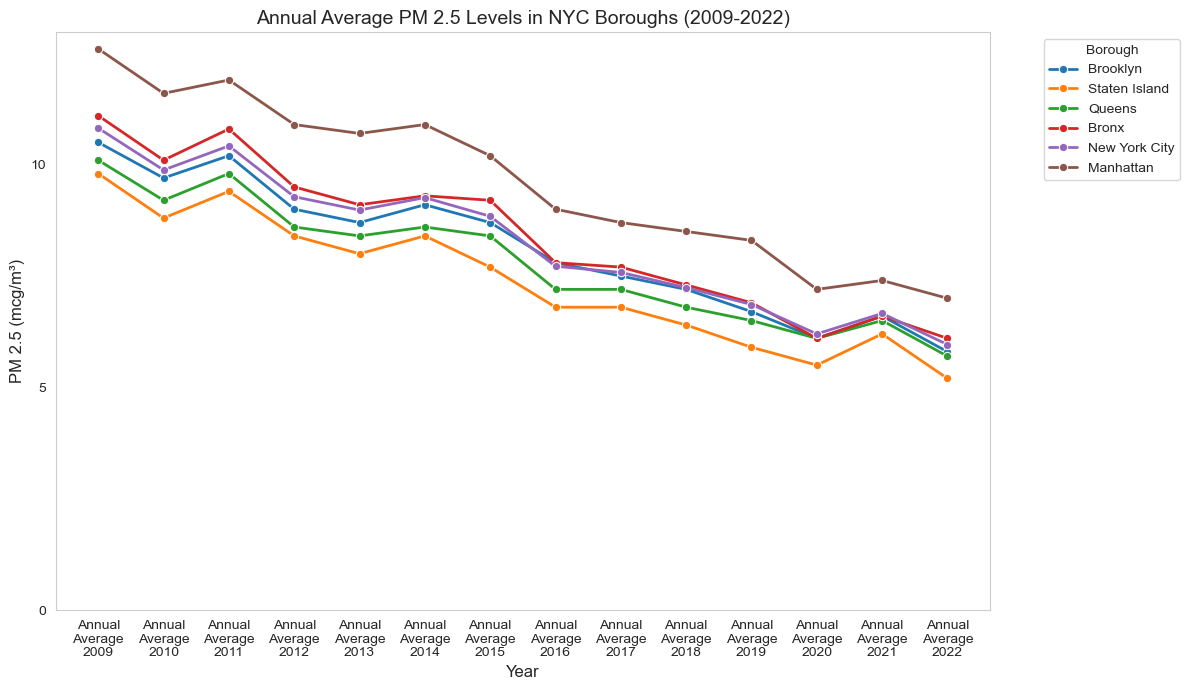

In [157]:
# extract and sort the year
pm_annual_avg['year'] = pm_annual_avg['time_period'].str.extract(r'(\d{4})')[0].astype(int)
pm_annual_avg = pm_annual_avg.sort_values(by="year")

# x,y
years = sorted(pm_annual_avg['year'].unique()) 
labels = [f"Annual\nAverage\n{year}" for year in years]
max_value = pm_annual_avg['data_value'].max()
max_tick = np.floor(max_value / 5) * 5

# plot
plt.figure(figsize=(12,7))
sns.lineplot(data=pm_annual_avg, x="year", y="data_value", hue="geo_place_name", marker="o", linewidth=2)
plt.xticks(years, labels, rotation=0, ha="center")
plt.yticks(range(0, int(max_tick) + 5, 5))
plt.title("Annual Average PM 2.5 Levels in NYC Boroughs (2009-2022)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("PM 2.5 (mcg/m³)", fontsize=12)
plt.grid(False)
plt.legend(title="Borough", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

## Q3: Hospitalizations due to air quality


Exposure to common air pollutants has been associated with respiratory and cardiovascular diseases. To better understand air quality and its impact on health in the city, we take a closer look at these indicators over time and across NYC neighborhoods.

In the following exercise, you would repeat similar tasks as Q2. 

Your tasks include the following:

* Filter out rows that contain neighborhood-wise information on cardiovascular and respiratory hospitalizations. No need to obtain city average for each period.

* In two subplots side-by-side, plot the cardiovascular and respiratory hospitalization indicators across time and by neighborhood. Assign a different color to each neighborhood. Similar to before, include at least:

    * A title;

    * Axes labels including what these indicators measure and their corresponding units, both axes in ascending order;

    * Lines with markers colored by boroughs (city average included);

    * A legend for the line colors.

You may reuse your code from Q2.

In [158]:
## ------------- TODO: your code here ---------------
df_cardiovascular = pd.DataFrame()
df_respiratory = pd.DataFrame()
## ----------------------------------------
#print(df["name"].unique())
df_cardiovascular = df[(df["name"] == "Cardiovascular hospitalizations due to PM2.5 (age 40+)") & (df["geo_type_name"] == "Borough")]
df_respiratory = df[(df["name"] == "Respiratory hospitalizations due to PM2.5 (age 20+)") & (df["geo_type_name"] == "Borough")]
df_cardiovascular=df_cardiovascular[["time_period","data_value","geo_place_name"]]
df_respiratory=df_respiratory[["time_period","data_value","geo_place_name"]]
print(df_cardiovascular.shape[0])
print(len(df_cardiovascular.time_period.unique()))
print(len(df_cardiovascular['geo_place_name'].unique()))
#df_respiratory.head()

25
5
5


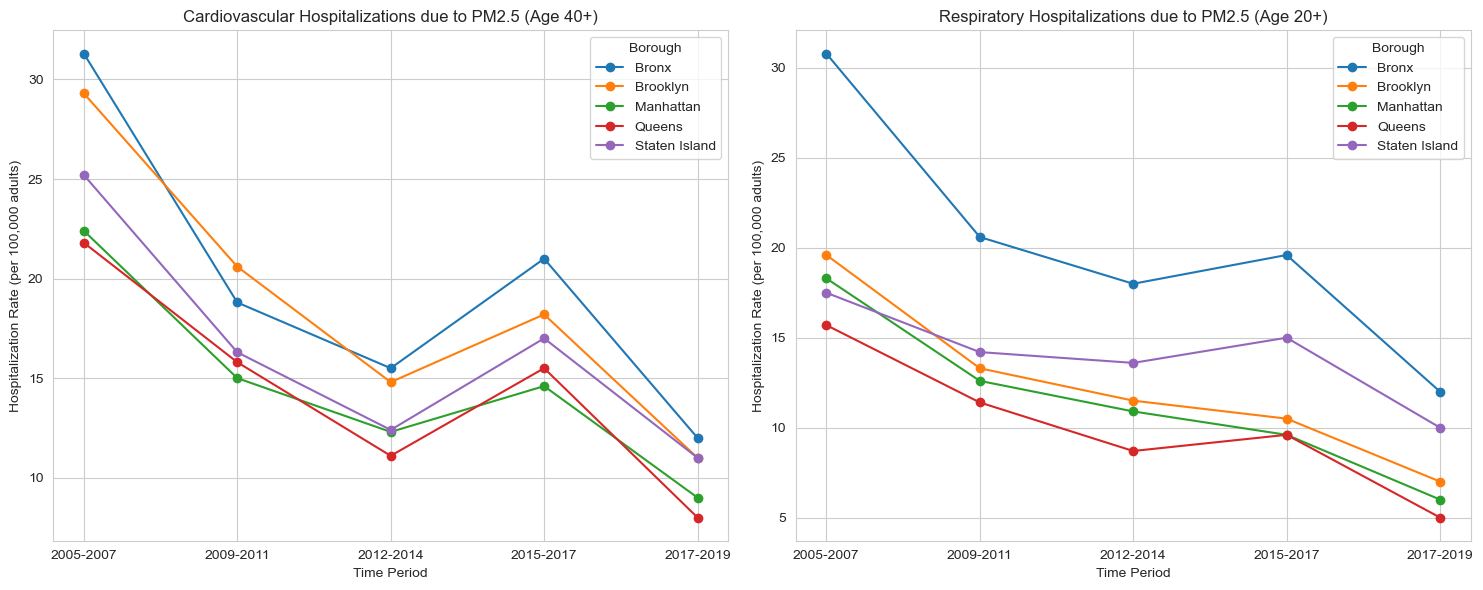

In [160]:
## ------------- TODO: your code here ---------------
## ----------------------------------------


# sort time period
df_cardiovascular["time_period_sort"] = df_cardiovascular["time_period"].str.extract(r'(\d{4})').astype(int)
df_respiratory["time_period_sort"] = df_respiratory["time_period"].str.extract(r'(\d{4})').astype(int)
df_cardiovascular = df_cardiovascular.sort_values("time_period_sort")
df_respiratory = df_respiratory.sort_values("time_period_sort")


#plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#cardiovascular hospitalizations plot
for neighborhood, group in df_cardiovascular.groupby("geo_place_name"):
    axes[0].plot(group["time_period"], group["data_value"], marker='o', label=neighborhood)

axes[0].set_title("Cardiovascular Hospitalizations due to PM2.5 (Age 40+)")
axes[0].set_xlabel("Time Period")
axes[0].set_ylabel("Hospitalization Rate (per 100,000 adults)")
axes[0].legend(title="Borough") 
axes[0].grid(True)

#respiratory hospitalizations plot
for neighborhood, group in df_respiratory.groupby("geo_place_name"):
    axes[1].plot(group["time_period"], group["data_value"], marker='o', label=neighborhood)

axes[1].set_title("Respiratory Hospitalizations due to PM2.5 (Age 20+)")
axes[1].set_xlabel("Time Period")
axes[1].set_ylabel("Hospitalization Rate (per 100,000 adults)")
axes[1].legend(title="Borough") 
axes[1].grid(True)


plt.tight_layout()
plt.show()